In [85]:
import tensorflow as tf
import keras

device = "cuda" if tf.config.list_physical_devices("GPU") else "cpu"

# Set memory growth for GPU
gpus = tf.config.experimental.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Chargement des données

In [86]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    "../../../data/OpenAnimalTracks/cropped_imgs/train",
    image_size=(224, 224),
    batch_size=16,
    shuffle=True,
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    "../../../data/OpenAnimalTracks/cropped_imgs/val",
    image_size=(224, 224),
    batch_size=16,
    shuffle=False,
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    "../../../data/OpenAnimalTracks/cropped_imgs/test",
    image_size=(224, 224),
    batch_size=16,
    shuffle=False,
)

Found 2514 files belonging to 18 classes.
Found 346 files belonging to 18 classes.
Found 719 files belonging to 18 classes.


In [87]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.05),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomContrast(0.1),
])

In [88]:
mobilenet_model = keras.applications.MobileNetV3Small(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

In [89]:
mobilenet_model.trainable = False

In [90]:
model = keras.Sequential([
    data_augmentation,
    mobilenet_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.02)),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.02)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(18, activation="softmax"),
])

In [91]:
model.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [92]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 939,120 (3.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 939,120 (3.58 MB)

In [93]:
history = model.fit(
    train_ds,
    epochs=80,
    validation_data=val_ds
)

Epoch 1/80
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0927 - loss: 18.0686 - val_accuracy: 0.2601 - val_loss: 14.0653
Epoch 2/80
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1782 - loss: 13.6740 - val_accuracy: 0.3092 - val_loss: 11.8431
Epoch 3/80
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2125 - loss: 11.6300 - val_accuracy: 0.3468 - val_loss: 10.2175
Epoch 4/80
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3005 - loss: 10.0267 - val_accuracy: 0.3410 - val_loss: 9.0211
Epoch 5/80
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3075 - loss: 8.8382 - val_accuracy: 0.3555 - val_loss: 8.0449
Epoch 6/80
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3422 - loss: 7.8778 - val_accuracy: 0.3468 - val_loss: 7.2346
Epoch 7/80
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3811 - loss: 7.0546 - val_accuracy: 0.3844 - val_loss: 6.5206
Epoch 8/80
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3662 - loss: 6.3851 - val_accu

In [94]:
model.save("mobilenet_model.keras")

In [ ]:
final_train_ds = keras.preprocessing.image_dataset_from_directory(
    "../../../data/dataset_no_oat_downsample",
    image_size=(224, 224),
    batch_size=16,
    shuffle=True,
    validation_split=0.2,
    seed=3,
    subset="training"
)

final_val_ds = keras.preprocessing.image_dataset_from_directory(
    "../../../data/dataset_no_oat_downsample",
    image_size=(224, 224),
    batch_size=16,
    shuffle=True,
    validation_split=0.2,
    seed=3,
    subset="validation"
)

Found 1105 files belonging to 13 classes.
Using 884 files for training.


Found 1105 files belonging to 13 classes.
Using 221 files for validation.


In [127]:
loaded_model = keras.models.load_model("mobilenet_model.keras")

In [128]:
loaded_model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,237,352 (8.53 MB)

 Trainable params: 432,402 (1.65 MB)

 Non-trainable params: 940,144 (3.59 MB)

 Optimizer params: 864,806 (3.30 MB)

In [129]:
mobilenet_base = loaded_model.layers[1:-1]

print(mobilenet_base)

model = keras.Sequential([
    mobilenet_base[0] 
])

for layer in mobilenet_base[1:]:
    model.add(layer)

model.summary()

[<Functional name=MobileNetV3Small, built=True>, <GlobalAveragePooling2D name=global_average_pooling2d_3, built=True>, <Dense name=dense_13, built=True>, <Dropout name=dropout_6, built=True>, <BatchNormalization name=batch_normalization_3, built=True>, <Dense name=dense_14, built=True>, <Dropout name=dropout_7, built=True>]


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,367,920 (5.22 MB)

 Trainable params: 427,776 (1.63 MB)

 Non-trainable params: 940,144 (3.59 MB)

In [130]:
loaded_model.trainable = True

for layer in model.layers[:-50]:
    layer.trainable = False

In [131]:
fine_tune_model = keras.Sequential([
    data_augmentation,
    model,
    keras.layers.Dense(18, activation="softmax"),
])

In [132]:
fine_tune_model.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history2 = fine_tune_model.fit(
    final_train_ds,
    epochs=150,
    validation_data=final_val_ds
)

Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.0733 - loss: 3.4852 - val_accuracy: 0.1222 - val_loss: 3.3597
Epoch 2/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0908 - loss: 3.3978 - val_accuracy: 0.1312 - val_loss: 3.2989
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1029 - loss: 3.2742 - val_accuracy: 0.1357 - val_loss: 3.2537
Epoch 4/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1204 - loss: 3.2307 - val_accuracy: 0.1403 - val_loss: 3.2168
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1333 - loss: 3.2137 - val_accuracy: 0.1312 - val_loss: 3.1831
Epoch 6/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1540 - loss: 3.1275 - val_accuracy: 0.1629 - val_loss: 3.1559
Epoch 7/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1463 - loss: 3.1019 - val_accuracy: 0.1719 - val_loss: 3.1291
Epoch 8/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1607 - loss: 3.0911 - val_accuracy: 0.1855 - 

KeyboardInterrupt: 

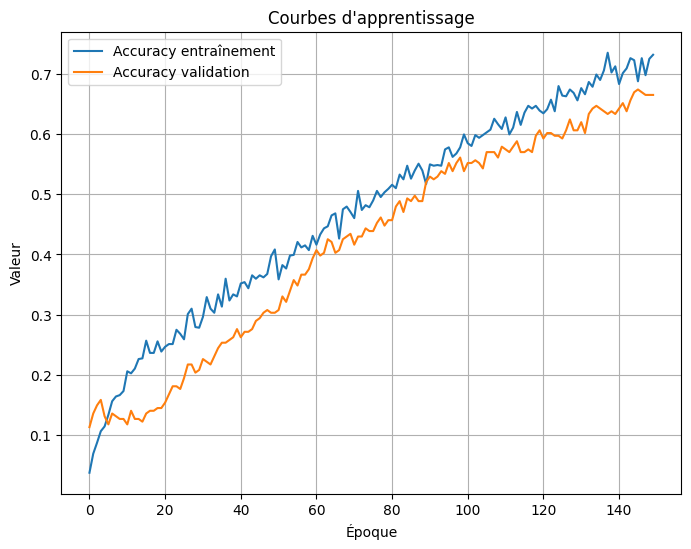

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Accuracy
plt.plot(history2.history['accuracy'], label='Accuracy entraînement')
plt.plot(history2.history['val_accuracy'], label='Accuracy validation')

plt.title("Courbes d'apprentissage")
plt.xlabel("Époque")
plt.ylabel("Valeur")
plt.legend()
plt.grid(True)
plt.show()

In [115]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
y_pred = fine_tune_model.predict(final_val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
y_true = []
for _, labels in final_val_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

In [ ]:
class_names = final_val_ds.class_names

In [124]:
cm = confusion_matrix(y_true, y_pred_classes)

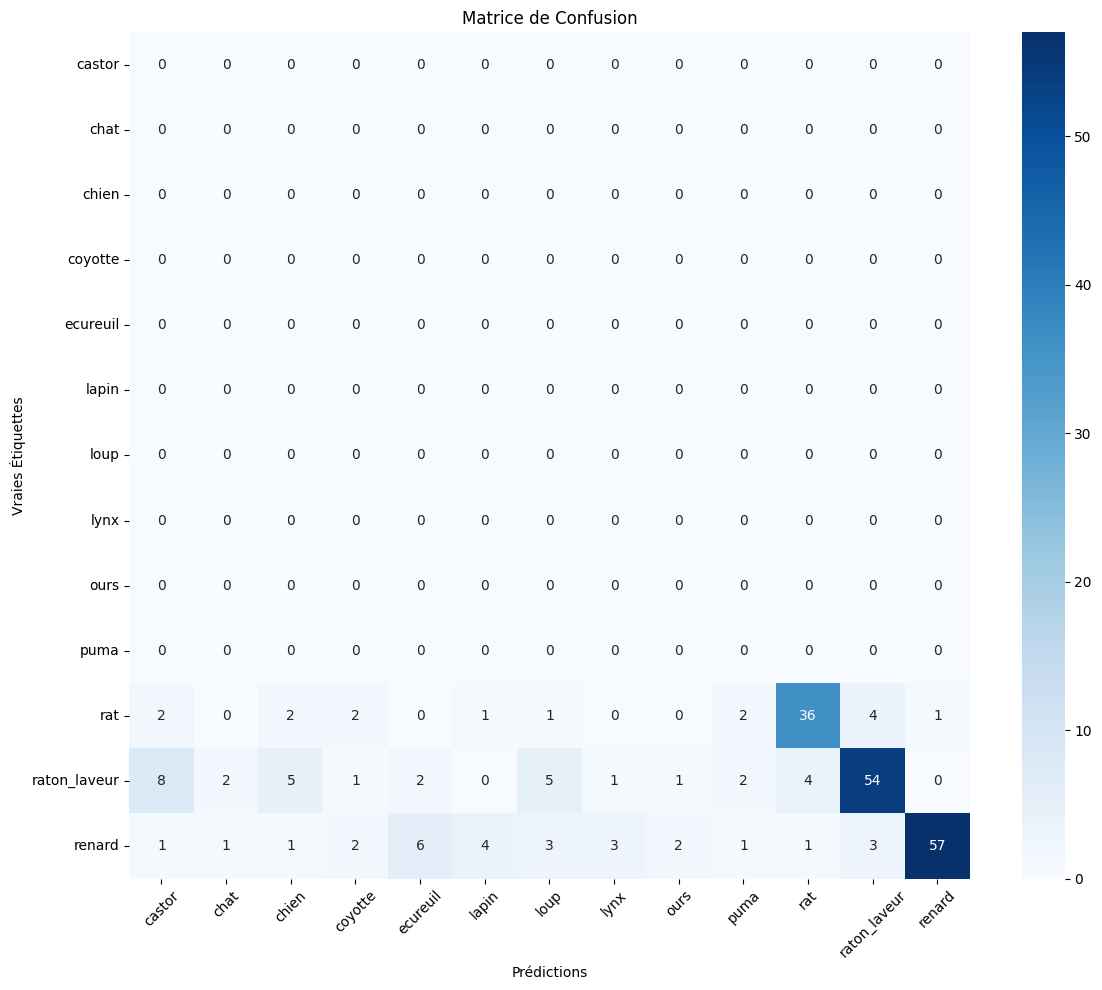

In [125]:
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies Étiquettes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()